# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Content</div>
   
#### <span style='color:#2E8BC0'>1| </span>[loading the Data and quick look](#section-one) 
#### <span style='color:#2E8BC0'>2| </span> [Splitting and Reshaping the data](#section-two) 
#### <span style='color:#2E8BC0'>3| </span>[Visualize Some images](#section-three)
#### <span style='color:#2E8BC0'>4| </span>[Recap of the Residual Neural networks](#section-four)
#### <span style='color:#2E8BC0'>5| </span>[Building the Blocks and the ResNet](#section-fife) 
#### <span style='color:#2E8BC0'>6| </span>[Visualise model performance](#section-six) 

<a id="section-one"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Loading the Data and quick look</div>

In [3]:
# importign the necessary libiraries 
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype

In [4]:
# load the data 
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [5]:
# see the shape of the data 
print(f" X_train shape: {train.shape}")
print(f" X_test shape: {test.shape}")

 X_train shape: (27455, 785)
 X_test shape: (7172, 785)


####  before getting hands dirty here is the problem
- we want to make a model to recognize the digit from pixels [ image ] so `classification problem`
- the data splitting must be at this 
     - `train data : to train the model on` 
     - `validation data :  to see the performance of the model and tune the model on` 
     - `test data : a blind hold data that the model never seen before to genelalize the model performance to launch`  

In [6]:
# have alook at the data 
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test.head() 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [8]:
labels = train["label"].value_counts().sort_index(ascending=True)
labels 

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

In [9]:
# see the labels 
fig=px.bar(x=labels.index , y=labels.values,title="Labels and thier images",
       labels={"x":"Label","y":"Number of Images"},
       text=labels.values,
       color_discrete_sequence=["#ccc"],
           
      )
fig.update_layout(title_x=.5,title_font_color="#fff",title_font_size=20,paper_bgcolor="#334e5c",font_color="#fff",
                 plot_bgcolor="#0C2D48",
                   xaxis = dict(
                    tickmode = 'linear',
#                     tickvals  =list(range(0,len(labels))),
                    ticktext= labels.index
                     )
                 )
fig.update_yaxes(showgrid=False)
fig.show()


#### searching for imbalance:
- what is `Imbalance` : case in wich some labels bigger than the others, so the model will tend to overfit these labels than others and this will case bigge losses in the other labels
- ` In our case i think the differnce will not make imbalance`, if you have other opinion please tell me.

<a id="section-two"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Splitting the data</div>

####  before getting hands dirty here is the problem
- we want to make a model to recognize the digit from pixels [ image ] so `classification problem`
- the data splitting must be at this 
     - `train data : to train the model on` 
     - `validation data :  to see the performance of the model and tune the model on` 
     - `test data : a blind hold data that the model never seen before to genelalize the model performance to launch` 

section-one- we have the train
- we will split the test data into `dev/test` sets

In [10]:
# take labels out of the date 
train_x = train.drop("label",axis=1)
train_y= train["label"]
test_x = test.drop("label",axis=1)
test_y= test["label"]
train_x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [11]:
# splitting the test into dev/blind sets
from sklearn.model_selection import train_test_split
dev_x,blind_x ,dev_y, blind_y = train_test_split(test_x,test_y,test_size=.8,stratify=test_y)

In [12]:
# show the data shapes
print(f" X_train shape: {train_x.shape}")
print(f" X_dev shape: {dev_x.shape}")
print(f" X_test shape: {blind_x.shape}")

 X_train shape: (27455, 784)
 X_dev shape: (1434, 784)
 X_test shape: (5738, 784)


In [13]:
# afinal step.. save the labels before one-hot-encoding 
test_classes= blind_y
dev_clasees = dev_y

## This is an intial splitting of the model and then train it in the full Train data

### Reshaping the date:
- to feed the date into the CNN it must be an image , in our case only a (28,28,1) shape which is a simple gray image
- using numpy to reshape the date

In [14]:
# frist conver the date frame into numpy array
train_x = train_x.to_numpy()
dev_x   = dev_x.to_numpy()
blind_x    = blind_x.to_numpy()

In [15]:
# second : reshape the array
train_x = train_x.reshape(-1,28,28,1)
dev_x   = dev_x.reshape(-1,28,28,1)
blind_x    = blind_x.reshape(-1,28,28,1)

In [16]:
# show the data shapes
print(f" X_train shape: {train_x.shape}")
print(f" X_dev shape: {dev_x.shape}")
print(f" X_test shape: {blind_x.shape}")

 X_train shape: (27455, 28, 28, 1)
 X_dev shape: (1434, 28, 28, 1)
 X_test shape: (5738, 28, 28, 1)


<a id="section-three"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize some images</div>

- in this section i will show some random images from the data

### showing some traingin date 

<ipython-input-17-ac96154c31c0>:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



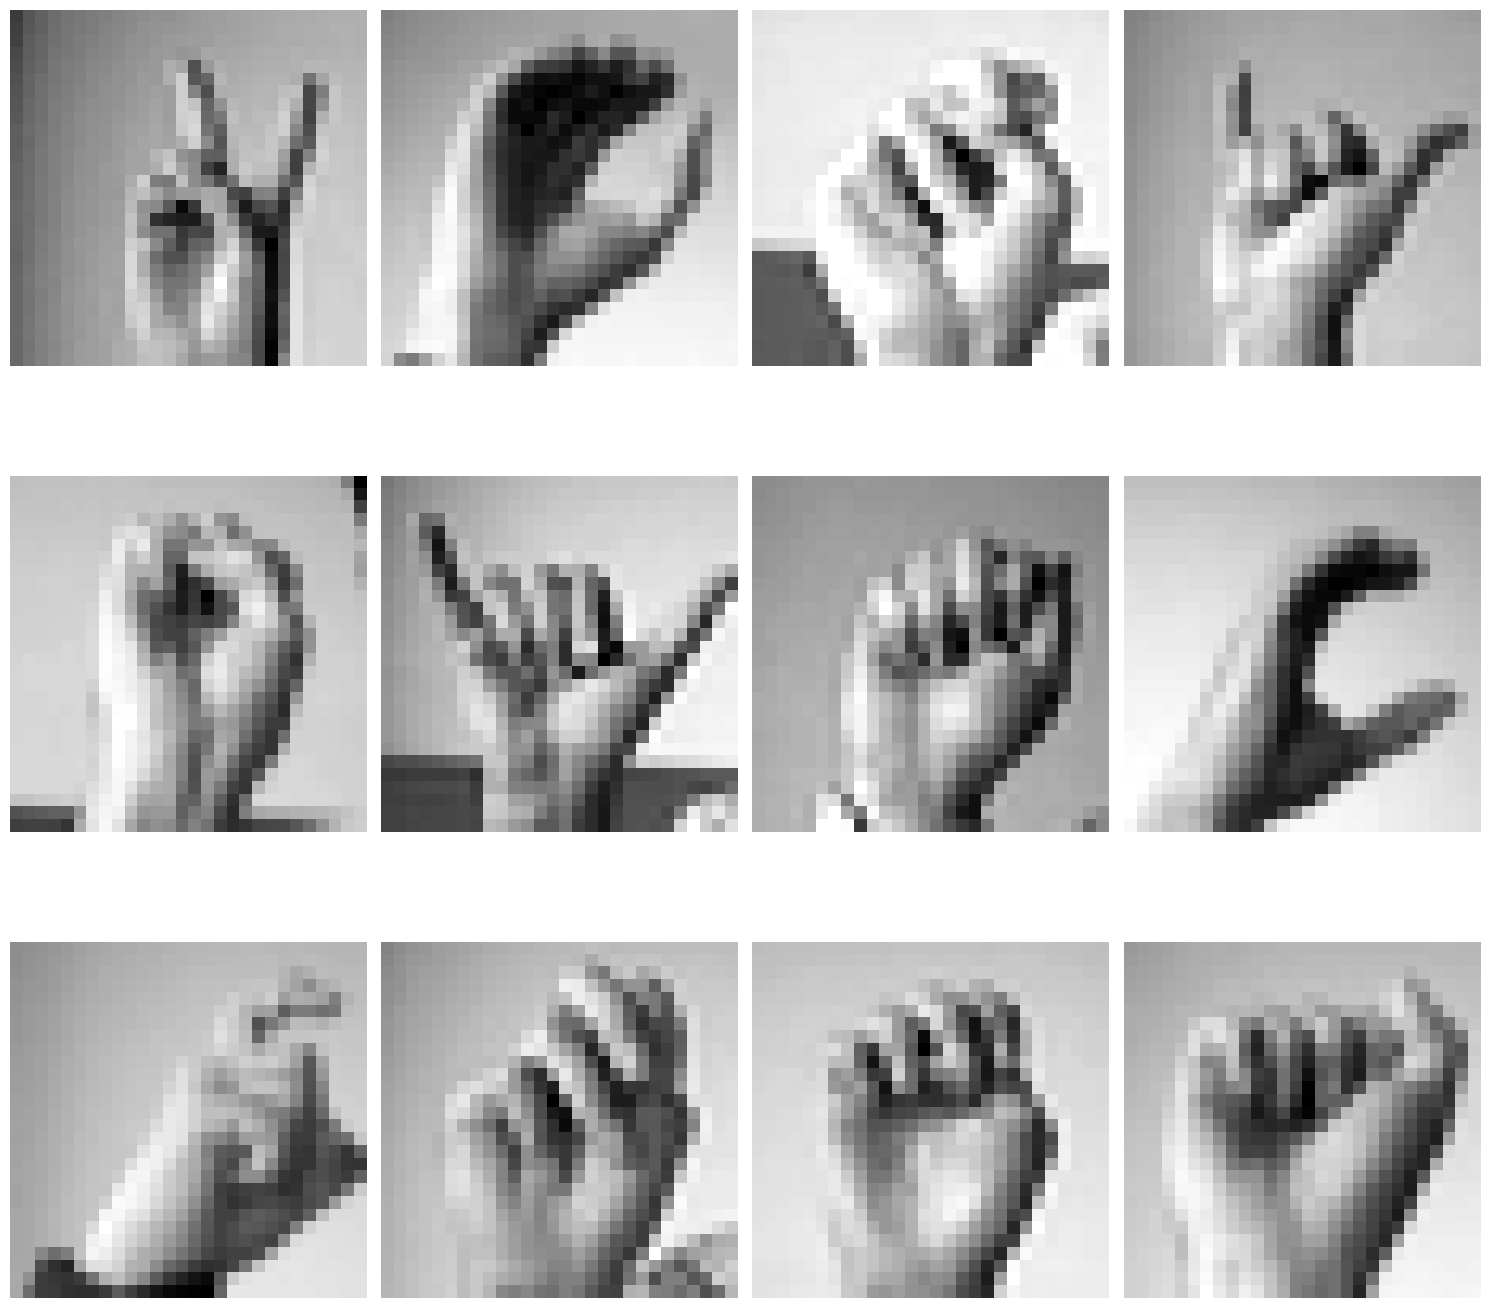

In [17]:
# get some random index fro the train
random_index = np.random.choice(range(len(train_x)),12)
# show the 12 random images 
plt.figure(figsize=(15,15))
plt.title("Some Random Training Images")
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(train_x[random_index[i]],cmap=plt.get_cmap("gray"))
    plt.axis("off")
plt.tight_layout()
plt.show() 

### showing some test images

<ipython-input-18-fe2e397036c2>:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



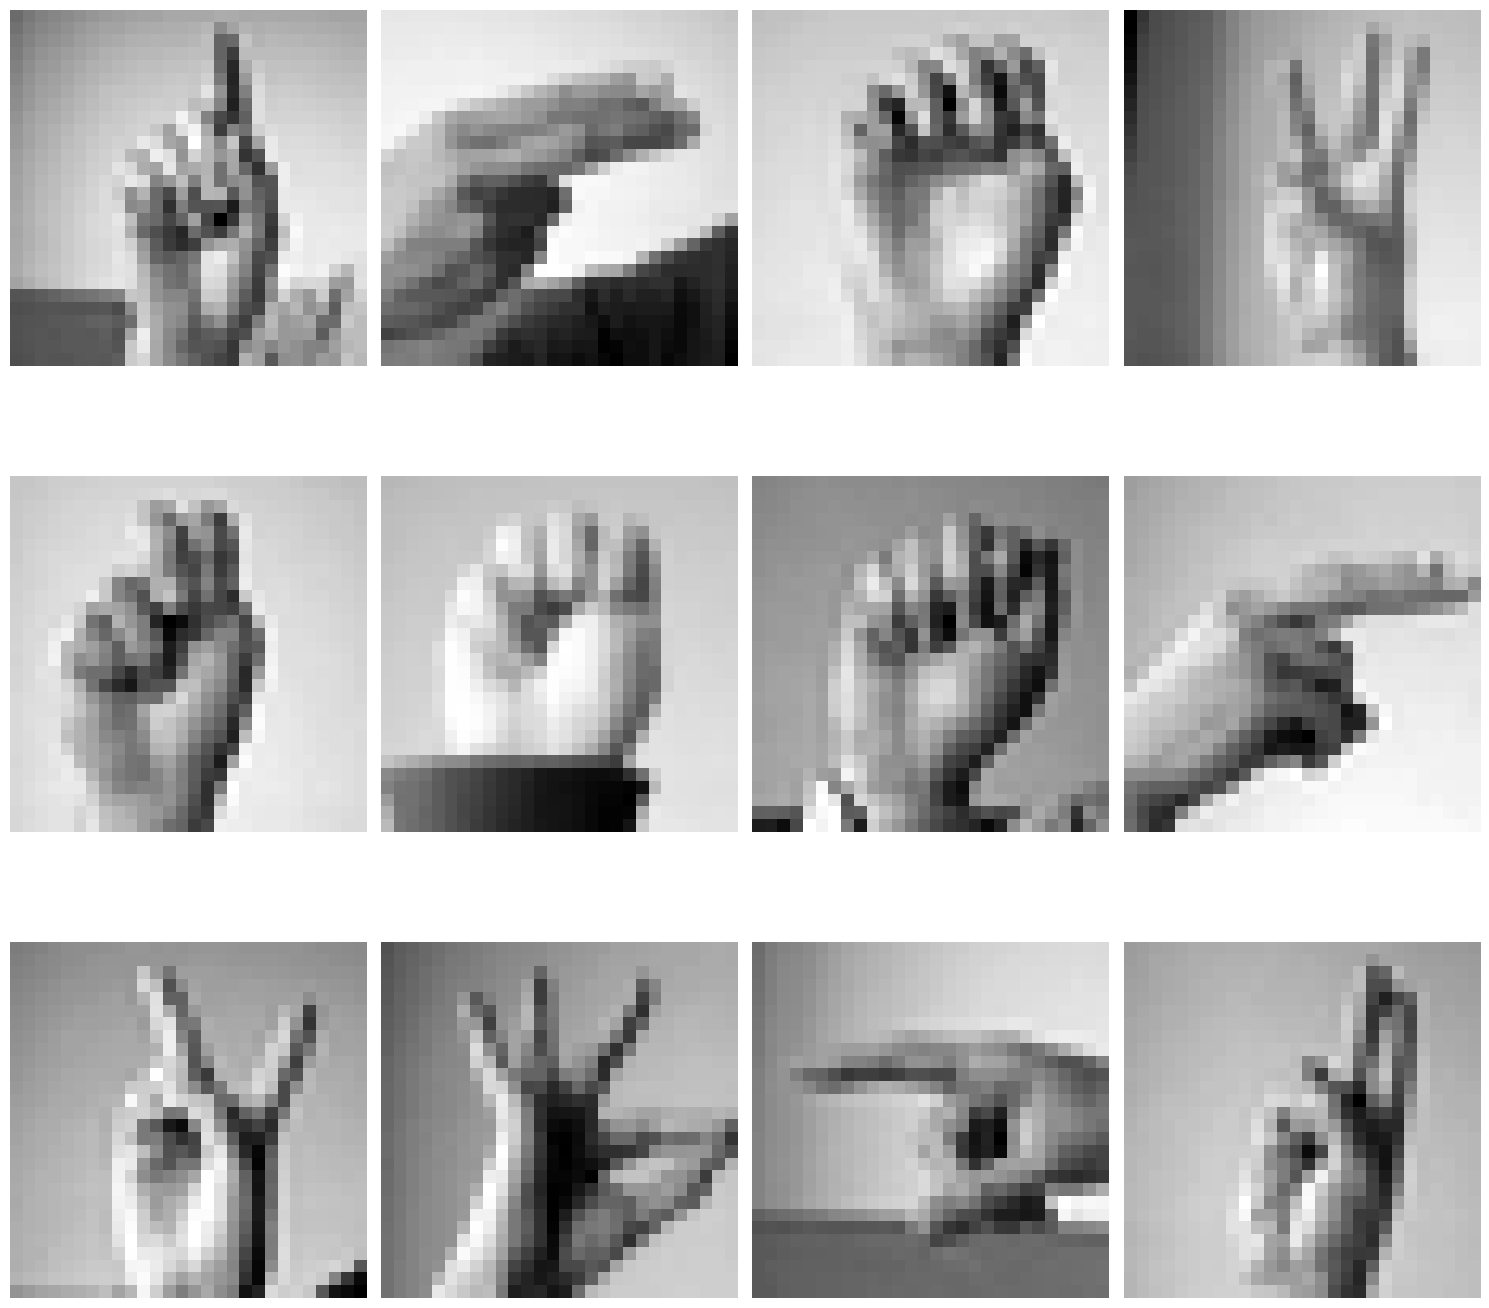

In [18]:
# get some random index fro the train
random_index = np.random.choice(range(len(blind_x)),12)
# show the 12 random images 
plt.figure(figsize=(15,15))
plt.title("Some Random Training Images")
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(blind_x[random_index[i]],cmap=plt.get_cmap("gray"))
    plt.axis("off")
plt.tight_layout()
plt.show() 

<p>we clearly see that the train and test date have the same distributions so there will be no </p> `data mismatch problem`

<a id="section-four"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">ResNet Recap</div>

## Why to use Very Deep Neural Networks
* we all know that the advantage of using a NN over classis linear models is the complexty the ANN add to the system.providing the final layers with more complex features than only having a linear relationship between the input and output 
* The main benefit of a very deep network is that it can represent very complex functions. It can also learn features at many different levels of abstraction, from edges (at the shallower layers, closer to the input) to very complex features (at the deeper layers, closer to the output).

## The Problem of Very Deep Neural Networks

* However, using a deeper network doesn't always help. A huge barrier to training them is vanishing gradients: very deep networks often have a gradient signal that goes to zero quickly, thus making gradient descent prohibitively slow.

* More specifically, during gradient descent, as you backpropagate from the final layer back to the first layer, you are multiplying by the weight matrix on each step, and thus the gradient can decrease exponentially quickly to zero (or, in rare cases, grow exponentially quickly and "explode," from gaining very large values). 

* During training, you might therefore see the magnitude (or norm) of the gradient for the shallower layers decrease to zero very rapidly as training proceeds, as shown below: 

<img src="https://drive.google.com/uc?export=view&id=1gUrKMNAkQQ7mqWtORfmaHjFm5XpcAOGu" style="width:450px;height:220px;margin:auto"></img>
<caption><center> <u> <font color='purple'> </u><font color='purple'><b>Vanishing gradient</b> <br> The speed of learning decreases very rapidly for the shallower layers as the network trains </center></caption>

## What is the solution to go deeper?
* here comes the advantage of ResNet
* let's first know the basic Residual block
In ResNets, a "shortcut" or a "skip connection" allows the model to skip layers:  

<img src="https://drive.google.com/uc?export=view&id=1zDA4bg--tVDWTWqRRsZnO-dAS1ZSMi34" style="width:650px;height:200px;margin:auto"></img>
<caption><center> <u> <font color='purple'> </u><font color='purple'> A ResNet block showing a skip-connection <br> </center></caption>

The image on the left shows the "main path" through the network. The image on the right adds a shortcut to the main path. By stacking these ResNet blocks on top of each other, you can form a very deep network.
* why it works?
    * The connections makes the output of the seconde layer as this 
        * A[l+2] = Activation( Z[l+1]*W[l+2] +b[l+2] + <span style="color:red"> A[l] </span>) -> l is the layer number
    * let's consider it as this , even if the two leyers learn nothing ( W[l+2],W[l] = 0) the output is still the same as the input 
         *  A[l+2] = Activation( <span style="color:red"> A[l] </span>) 
    
   * ResNet blocks with the shortcut also makes it very easy for one of the blocks to learn an identity function. This means that you can stack on additional ResNet blocks with little risk of harming training set performance.  
    
* On that note, there is also some evidence that the ease of learning an identity function accounts for ResNets' remarkable performance even more than skip connections help with `vanishing gradients`.


<a name='3-1'></a>
## Block types according to size of input and output of the block
### 1 - The Identity Block

The identity block is the standard block used in ResNets, and corresponds to the case where the input activation (say $a^{[l]}$) has the same dimension as the output activation (say $a^{[l+2]}$). To flesh out the different steps of what happens in a ResNet's identity block, here is an alternative diagram showing the individual steps:

<img src="https://drive.google.com/uc?export=view&id=1ITFg5s1_UVPSZ28aQbdwdA0HPF5POrO6" style="width:650px;height:150px;margin:auto" ></img>
<caption><center> <u> <font color='purple'> </u><font color='purple'><b>Identity block.</b> Skip connection "skips over" 2 layers. </center></caption>

The upper path is the "shortcut path." The lower path is the "main path." In this diagram, notice the CONV2D and ReLU steps in each layer. To speed up training, a BatchNorm step has been added. 

<img src="https://drive.google.com/uc?export=view&id=1MOHOnjGxKN6Dvhb5X1KWxRbSCNpiZqBY" style="width:650px;height:150px;">
    <caption><center> <u> <font color='purple'></u><font color='purple'>  : <b>Identity block.</b> Skip connection "skips over" 3 layers.</center></caption>


### 2 - The Convolutional Block

The ResNet "convolutional block" is the second block type. You can use this type of block when the input and output dimensions don't match up. The difference with the identity block is that there is a CONV2D layer in the shortcut path: 

<img src="https://drive.google.com/uc?export=view&id=17Z5iCvHj4NqF3UKgGcR-GlIPzgdRHrnv" style="width:650px;height:150px;"></img>
<caption><center> <u> <font color='purple'> </u><font color='purple'>  <b>Convolutional block</b> </center></caption>

* The CONV2D layer in the shortcut path is used to resize the input $x$ to a different dimension, so that the dimensions match up in the final addition needed to add the shortcut value back to the main path to make the addtion operation valid 
* For example, to reduce the activation dimensions's height and width by a factor of 2, you can use a 1x1 convolution with a stride of 2. 
* The CONV2D layer on the shortcut path does not use any non-linear activation function. Its main role is to just apply a (learned) linear function that reduces the dimension of the input, so that the dimensions match up for the later addition step. 


The details of the convolutional block are as follows. 

First component of main path:
- The first CONV2D has $F_1$ filters of shape (1,1) and a stride of (s,s). Its padding is "valid".
- The first BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters. 

Second component of main path:
- The second CONV2D has $F_2$ filters of shape (f,f) and a stride of (1,1). Its padding is "same".
- The second BatchNorm is normalizing the 'channels' axis.
- Then apply the ReLU activation function. This has no hyperparameters. 

Third component of main path:
- The third CONV2D has $F_3$ filters of shape (1,1) and a stride of (1,1). Its padding is "valid". 
- The third BatchNorm is normalizing the 'channels' axis. Note that there is no ReLU activation function in this component. 

Shortcut path:
- The CONV2D has $F_3$ filters of shape (1,1) and a stride of (s,s). Its padding is "valid".  
- The BatchNorm is normalizing the 'channels' axis. 

Final step: 
- The shortcut and the main path values are added together.
- Then apply the ReLU activation function. This has no hyperparameters. 


<a id="section-fife"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Building basic blocks and The ResNet</div>

#### The model is insipred form the ResNet-50 Model
<img src="https://drive.google.com/uc?export=view&id=1R8aVV1wqI1jv9bxPJSthdVIzCsYdiENQ" style="width:850px;height:150px;margin:auto"></img>
<caption><center> <u> <font color='purple'> </u><font color='purple'><b>ResNet-50 model</b> </center></caption>


In [19]:
import tensorflow as tf 

In [20]:
# the identity block
def identity_block(X, f, filters, training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # first component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # second component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (1,1), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # third component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
   # adding the two paths 
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    # return the las tensor
    return X

In [21]:
# the identity block
def convolutional_block(X, f, filters, s=2,training=True):
    # filter of the three convs 
    f1,f2,f3 = filters
    X_shortcut = X 
    
    # first component 
    X = tf.keras.layers.Conv2D(filters = f1, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # second component 
    X = tf.keras.layers.Conv2D(filters = f2, kernel_size = f, strides = (s,s), padding = 'same')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
    X = tf.keras.layers.Activation('relu')(X)
    # third component 
    X = tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (1,1), padding = 'valid')(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X, training = training) # Default axis
   # converting the input volume to the match the last output for adding
    X_shortcut =tf.keras.layers.Conv2D(filters = f3, kernel_size = 1, strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = tf.keras.layers.BatchNormalization(axis = 3)(X_shortcut, training = training)
    X = tf.keras.layers.Add()([X_shortcut,X])
    X = tf.keras.layers.Activation('relu')(X)
    # last , add the two tensors
    X = tf.keras.layers.Add()([X, X_shortcut])
    X = tf.keras.layers.Activation('relu')(X)
    
    # return the las tensor
    return X

In [22]:
# UNQ_C3
# GRADED FUNCTION: ResNet50

def ResNet50(input_shape = (28, 28, 1), classes =len(labels) ):
    
    # Define the input as a tensor with shape input_shape
    X_input = tf.keras.Input(input_shape)
    
    # Zero-Padding
    X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = tf.keras.layers.Conv2D(64, (5, 5), strides = (1, 1))(X)
    X = tf.keras.layers.BatchNormalization(axis = 3)(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], s = 1)
    # note: in building the identity block we make sure the input volume has the same dimesions as the output volume
    # means , the last filter of the block must be the same as the last filter of the previous block
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])

    
    ## Stage 3 
    X = convolutional_block(X, f = 3, filters = [128,128,512], s = 2)
    X = identity_block(X, 3, [128,128,512]) 
    X = identity_block(X, 3, [128,128,512])
    X = identity_block(X, 3, [128,128,512]) 
    
    ## Stage 4
    X = convolutional_block(X, f = 3, filters =  [256, 256, 1024], s = 2) 
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  
    X = identity_block(X, 3,  [256, 256, 1024])  

    ## Stage 5 
#     X = convolutional_block(X, f = 3, filters =   [512, 512, 2048], s = 1)  
#     X = identity_block(X, 3,   [512, 512, 2048]) 
#     X = identity_block(X, 3,   [512, 512, 2048])  
    
    ## addd average pool layer
    X = tf.keras.layers.AveragePooling2D((2,2))(X)

    # output layer
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(classes, activation='softmax')(X)
    
    
    # Create model
    model = tf.keras.Model(inputs = X_input, outputs = X)

    return model

In [23]:
model =ResNet50()
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 64)   1664        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 30, 30, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                   

` The model is ready to be trained `

In [24]:
# onehot encoding the labels
# for that lsets use pandas.getdummies method
train_y = pd.pandas.get_dummies(train_y)
dev_y   = pd.pandas.get_dummies(dev_y)
blind_y = pd.pandas.get_dummies(blind_y)

In [25]:
train_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [26]:
dev_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [27]:
# now compiling the model
model.compile(optimizer="adam",metrics=["accuracy"],loss = "categorical_crossentropy")

In [28]:
# data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [29]:
best_model =tf.keras.callbacks.ModelCheckpoint("best.h5",monitor="val_accuracy")


In [30]:
history = model.fit_generator(datagen.flow(train_x,train_y,batch_size=64),validation_data =datagen.flow(dev_x,dev_y),epochs =10,callbacks=[best_model])

Epoch 1/10


<ipython-input-30-54b717a1f914>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



429/429 [==============================] - 80s 70ms/step - loss: 1.5719 - accuracy: 0.6962 - val_loss: 0.3590 - val_accuracy: 0.8947
Epoch 2/10
429/429 [==============================] - 27s 63ms/step - loss: 0.1492 - accuracy: 0.9550 - val_loss: 0.2355 - val_accuracy: 0.9358
Epoch 3/10
429/429 [==============================] - 27s 63ms/step - loss: 0.0803 - accuracy: 0.9753 - val_loss: 0.3158 - val_accuracy: 0.9240
Epoch 4/10
429/429 [==============================] - 28s 65ms/step - loss: 0.0790 - accuracy: 0.9779 - val_loss: 0.0842 - val_accuracy: 0.9763
Epoch 5/10
429/429 [==============================] - 27s 64ms/step - loss: 0.0640 - accuracy: 0.9842 - val_loss: 0.0981 - val_accuracy: 0.9756
Epoch 6/10
429/429 [==============================] - 27s 64ms/step - loss: 0.0627 - accuracy: 0.9840 - val_loss: 0.1311 - val_accuracy: 0.9770
Epoch 7/10
429/429 [==============================] - 27s 64ms/step - loss: 0.0374 - accuracy: 0.9903 - val_loss: 0.0851 - val_accuracy: 0.9847
Epo

In [31]:
model.load_weights("best.h5")

In [32]:
X = range(len(history.history["loss"]))
train_loss = history.history["loss"]
val_loss =history.history["val_loss"]
train_acc = history.history["accuracy"]
val_accuracy =history.history["val_accuracy"]

<ipython-input-33-c887a675ab3c>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



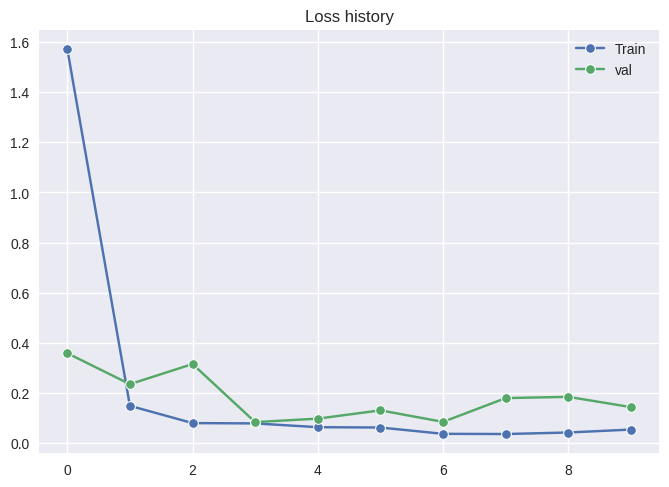

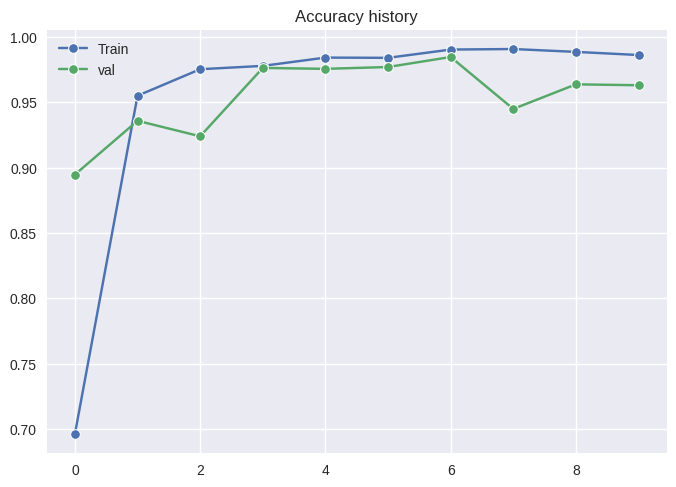

In [33]:
# show the performance 
import seaborn as sns 
plt.style.use("seaborn")
plt.figure()
plt.title("Loss history")
sns.lineplot(x=X,y=train_loss,label="Train",marker="o")
sns.lineplot(x=X,y=val_loss,label="val",marker="o")
plt.show()
plt.figure()
plt.title("Accuracy history")
sns.lineplot(x=X,y=train_acc,label="Train",marker="o")
sns.lineplot(x=X,y=val_accuracy,label="val",marker="o")
plt.show()

In [34]:
model.evaluate(blind_x,blind_y)

180/180 [==============================] - 3s 14ms/step - loss: 0.1333 - accuracy: 0.9824


[0.13334815204143524, 0.9823980331420898]

#### we observe that the model performance is good and by inceasing the epochs the model can get better

<a id="section-six"></a>
# <div style="color:#fff;display:fill;border-radius:10px;background-color:#0C2D48;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Visualize model performance</div>

In [35]:
letters ="ABCDEFGHIKLMNOPQRSTUVWXY"
dic={}
for i in range(len(letters)):
    if i>=9:
        dic[i+1]=letters[i]
    else:
        dic[i]=letters[i]

In [36]:
dic

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

In [37]:
train_y.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [38]:
# making a fuction that predict digit 
def prdict(image):
    image =image.reshape(1,28,28,1)
    labels = list(dic.keys()) 
    probalility_prdicted = model.predict(image)
    predicted_digit = labels[np.argmax(probalility_prdicted)]
    return predicted_digit

In [39]:
prdict(blind_x[0].reshape(1,28,28,1))

1/1 [==============================] - 1s 1s/step


23

1/1 [==============================] - 0s 23ms/step


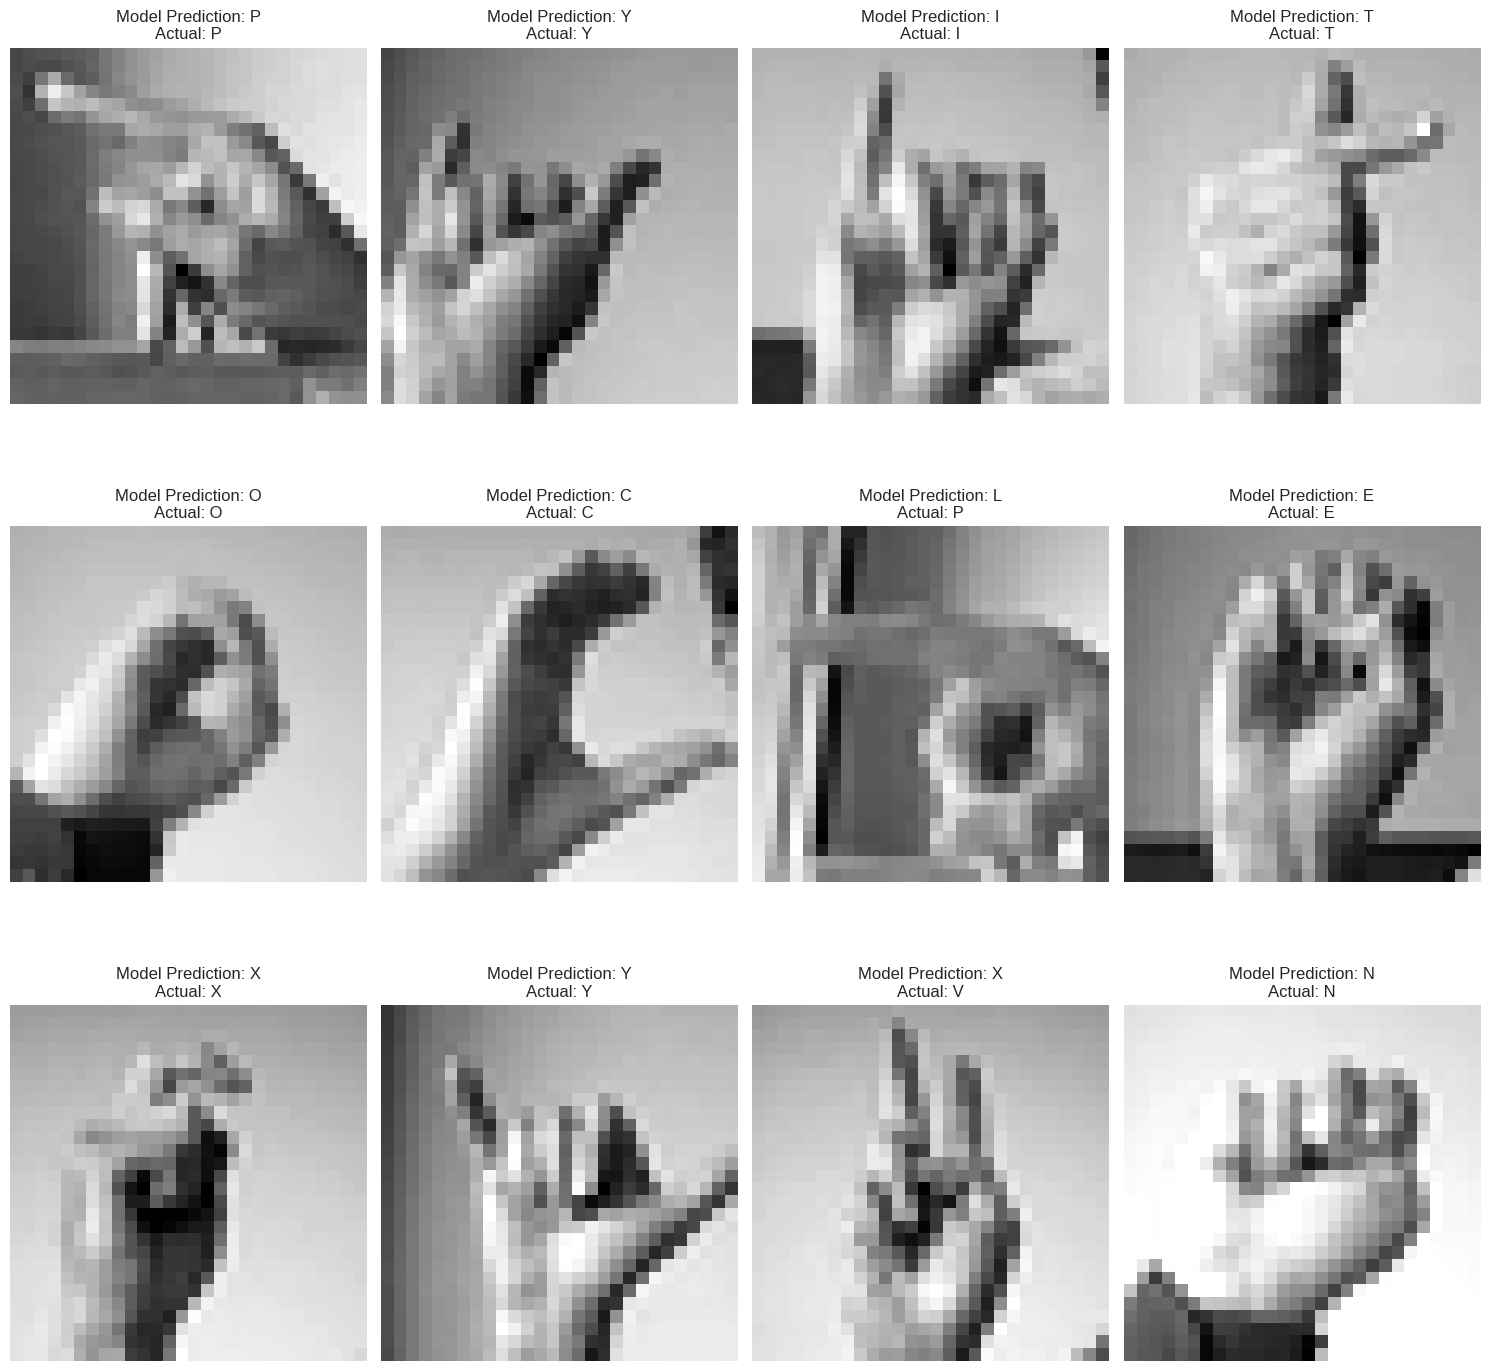

In [40]:
# get some random index fro the train
random_index = np.random.choice(range(len(blind_x)),12)
# show the 12 random images 
plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(3,4,i+1)
    predicted_digit = prdict(blind_x[random_index[i]])
    plt.imshow(blind_x[random_index[i]],cmap=plt.get_cmap("gray"))
    # the actual class 
    actual_class= test_classes.iloc[random_index[i]]
    # the actual letter 
    actual_letter = dic[actual_class]
    # the predicted letter 
    predicted_letter = dic[predicted_digit]
    
    plt.title(f"Model Prediction: {predicted_letter}\nActual: {actual_letter}")
    plt.axis("off")
plt.tight_layout()
plt.show() 